# Twitter Data Scraping

In [2]:
# imports

import tweepy
import webbrowser
import time 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv('john.env')


Bad key "text.kerning_factor" on line 4 in
C:\Users\jakel\anaconda3\envs\ml2env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


True

In [3]:
consumer_key = os.getenv('TWITTER_API')
consumer_secret = os.getenv('TWITTER_SECRET_KEY')

In [4]:
type(consumer_key)

str

In [14]:
# Generate a Twitter access token that maps to our API keys to that token using a PIN number Twitter gives you.
# You can only get the PIN number unless you have a Twitter API. 
callback_uri = 'oob'                                                      # declare a uniform resource indicator, and set to 'out-of-band'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)   # creates an authentication object. stores our consumer and secret key. #OAuth is an authetication that requires a user. 
redirect_url = auth.get_authorization_url()                               # stores the authorization url to redirect the user.     
print(f'Go to this website, and click Authorize App to get a PIN number. ', redirect_url)                         
webbrowser.open(redirect_url)                                             # Webbrowser automatically open you browser, redirect you to the url, so you don't have to copy and paste it in your browser. 
prompt = '>'                                                              # displays a blank input bar that we type the PIN number in.
print('enter PIN number in prompt.')
user_PIN = input(prompt)                                                  # enter the PIN number and now you'll have an access token. 
auth.get_access_token(user_PIN)                                           # This                
print('Your access key ', auth.access_token)
print('The secret key ', auth.access_token_secret)
# Output will display access keys for the user mapped to the PIN number that was mapped to the consumer keys. These keys do not change no matter how many times or different PIN numbers you get. 



Go to this website, and click Authorize App to get a PIN number.  https://api.twitter.com/oauth/authorize?oauth_token=qfM0lAAAAAABQnJ4AAABevkqwms
enter PIN number in prompt.
Your access key  18325825-cHvbx5Kpg6HFjIrFYo8wfr8jheadKCXjUNQG57BvU
The secret key  Bk14J5TH5g4YmZvRmra7u23uwrkfwgWrNHHs0v4G0Ttby


In [12]:
print(auth.access_token)
print(auth.access_token_secret)

18325825-cHvbx5Kpg6HFjIrFYo8wfr8jheadKCXjUNQG57BvU
Bk14J5TH5g4YmZvRmra7u23uwrkfwgWrNHHs0v4G0Ttby


In [19]:
# Create an tweepy API object. That uses our access token stored in auth.  
api = tweepy.API(auth)

In [20]:
# Set the Twitter user we want to target using their @handle
user = api.get_user('elonmusk')

In [21]:
# Check how many followers a user has, and how many people the account follows.
print(user.followers_count, user.friends_count)                                            # 31,000 followers. 1403 following

58648877 105


In [22]:
# Extract tweets from the Twitter user account timeline. 

posts = api.user_timeline(screen_name = 'elonmusk', count=500, lang = 'en', tweet_mode='extended')

In [23]:
# Create a dataframe for the tweets

df = pd.DataFrame(
    [tweet.full_text for tweet in posts],
    columns = ['Tweets']
)

df.head()

,Tweets
0,@NicAnsuini 😉
1,@WatchersTank @LabPadre Congrats SpaceX tower ...
2,@DJSnM Orbital precession takes a long time. W...
3,Haha https://t.co/pPLZGxITce
4,@TroyRubert @SamTwits @engineers_feed I am alr...


In [24]:
df.shape

(23, 1)

## Senitment Analysis Part - A

In [25]:
# Clean the text

def clean_text(text):

    # replace the @ with an empty string
    text = re.sub(r'@[A-Za-z0-9]+', '', text)        # Removes @ mentions. r means expression is raw string.
    text = re.sub(r'#', '', text)                    # Remove the # hashtag symbols
    text = re.sub(r'RT[\s]+', '', text)              # Removes retweets
    text = re.sub(r'https?:\/\/\S+', '', text)       # Removes hyperlink
    
    return text

# Call the clean text function on the Tweets  
df['Tweets'] = df['Tweets'].apply(clean_text) 

# Show the DataFrame
df.head()

,Tweets
0,😉
1,Congrats SpaceX tower team &amp; supporting ...
2,Orbital precession takes a long time. With St...
3,Haha
4,_feed I am already chewing on so much glass ...


In [26]:
# Subjectivity and polarity of the Tweets. 

# Subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. value ranges from 0-1. 0 is objective, and 1 is very subjective.

# Creata a function to get the subjectivity of a Tweet 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity of a Tweet 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the updated DataFrame
df

,Tweets,Subjectivity,Polarity
0,😉,0.000000,0.000000
1,Congrats SpaceX tower team &amp; supporting ...,0.250000,0.312500
2,Orbital precession takes a long time. With St...,0.400000,0.025000
3,Haha,0.300000,0.200000
4,_feed I am already chewing on so much glass ...,0.200000,0.250000
5,_feed I’m so dying to do a supersonic vtol el...,0.350000,0.350000
6,_tesla That’s a low bar. Carmakers have never...,0.440000,0.293333
7,_tesla Tesla software team is excellent even w...,0.415000,0.565000
8,Great work by Tesla Giga Berlin team &amp; s...,0.500000,0.556250
9,🤣,0.000000,0.000000


In [27]:
# Compute the negative, neutral, and positive analysis

# Create a function to make a score of the polarity.
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positve'

# Add a new column to the DataFrame called Analysis. 
df['Analysis'] = df['Polarity'].apply(getAnalysis)              # applies the getAnalysis() function on the Polarity colummn


df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,😉,0.00,0.0000,Neutral
1,Congrats SpaceX tower team &amp; supporting ...,0.25,0.3125,Positve
2,Orbital precession takes a long time. With St...,0.40,0.0250,Positve
3,Haha,0.30,0.2000,Positve
4,_feed I am already chewing on so much glass ...,0.20,0.2500,Positve


In [28]:
# Save to CSV file 
df.to_csv('elon_twitter_feed_2.csv')

## Sentiment Analysis Part B - Break down the positive and negative Tweets, visualize them

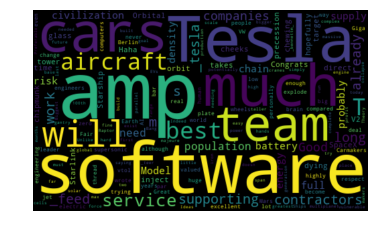

In [29]:
# Word Clouds 

allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation ='bilinear')
plt.axis('off')
plt.show() 

In [30]:
# Show the value counts of positive, negative, and neutral Tweets. 

df['Analysis'].value_counts()

Positve     14
Neutral      6
Negative     3
Name: Analysis, dtype: int64

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

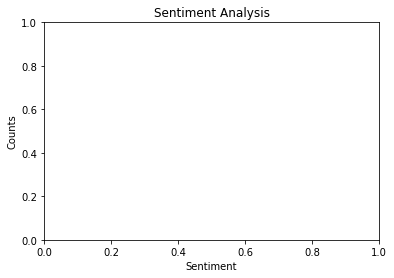

In [31]:
# plot the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [32]:
# Print all positive Tweets. 

# j is simply to number the output as a string to make it ordered.
j=1

# Create a new sorted df, store the sorted Polarities 
sortedDF = df.sort_values(by=['Polarity'])                        # most positive tweets will be first since they have the higher polarity scores.

# looping through number of rows in sorted Dat
for i in range(0, sortedDF.shape[0]): 
    if(sortedDF['Analysis'][i] == 'Positve'):                     # only positive polarity tweets should be printed out. 
        print(str(j) + ') ' + sortedDF['Tweets'][i]) 
        print()   #print a new-line to make output double-spaced.
        j = j + 1 

1)   Congrats SpaceX tower team &amp; supporting contractors!

2)  Orbital precession takes a long time. With Starship &amp; Starlink V2.0, hopefully we can direct inject to target orbit.

3) Haha 

4)   _feed I am already chewing on so much glass that I have chipmunk cheeks!

5)  _feed I’m so dying to do a supersonic vtol electric jet! But I already have way too much on my plate. Any more work and my brain will explode.

6)  _tesla That’s a low bar. Carmakers have never valued software engineering highly, although VW is trying to change that. 

I personally wrote software for 20 years &amp; have huge respect for software engineers. Tesla is on par with best software companies &amp; is leader in real world AI.

7) _tesla Tesla software team is excellent even when compared to the best software companies. This is a big deal, as cars are very much computers on wheels.

8)   Great work by Tesla Giga Berlin team &amp; supporting contractors!

9)   Good thread

10)     Fair enough

11) Popul

In [33]:
# print the negative Tweets
j=1

sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j + 1

1)  Cars today are far more complex than Model T, with a global supply chain that is vulnerable to force majeure risk. 

Like Model T, supply chain for battery EVs simply doesn’t exist at massive scale, so must be built in parallel.

Ideas are easy, production is hard.

2)  Only a little taller, but much bigger base &amp; two gantry cranes that run full span

3) @_bennettm_ Probably in a few months



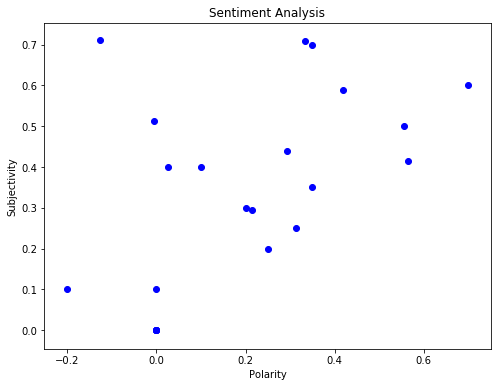

In [34]:
# Plot the polarity and subjectivity 

plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
query = 'dogecoin'             # set our query for the #dogecoin hashtag
api.search(q=query)             # api call on that query